In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('./train.csv')
data.tail()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1
73798,15796,GRD,M,34,N,N,0,0,2,2,3,25000,N,0


In [3]:
print(f'Train size = {data.shape}')

Train size = (73799, 14)


Посмотрим на данные:

- client_id - идентификатор клиента
- education - уровень образования
- sex - пол заёмщика
- age - возраст заёмщика
- car - флаг наличия автомобиля
- car_type - флаг автомобиля-иномарки
- decline_app_cnt - количество отказанных прошлых заявок
- good_work - флаг наличия «хорошей» работы
- bki_request_cnt - количество запросов в БКИ
- home_address - категоризатор домашнего адреса
- work_address - категоризатор рабочего адреса
- income - доход заёмщика
- foreign_passport - наличие загранпаспорта
- default - наличие дефолта

<AxesSubplot:xlabel='default', ylabel='count'>

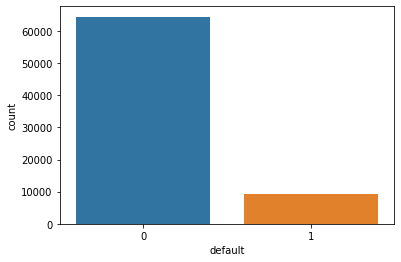

In [4]:
sns.countplot(x='default', data=data)

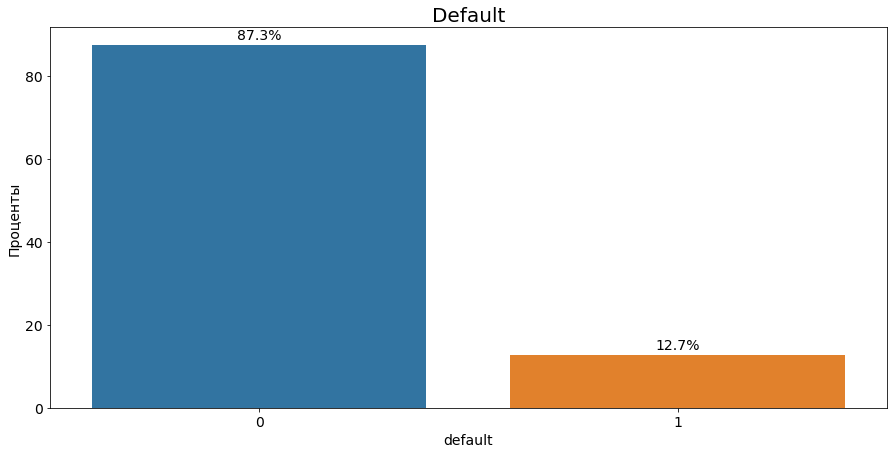

In [5]:
# нормирование на размер датасета
norm_target = (data
               .default
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [7]:
# заменим object features на числовые
# sex --> dummies
# data = data.join(pd.get_dummies(data['sex'])).drop('sex', axis=1)
# data

In [8]:
# car, car_type, foreign_passport
#for col in ['car', 'car_type', 'foreign_passport']:
#    data[col] = data[col].apply(lambda x: 1 if x=='Y' else 0)
#data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [10]:
data.isna().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

In [11]:
data.education.unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD', nan], dtype=object)

<AxesSubplot:>

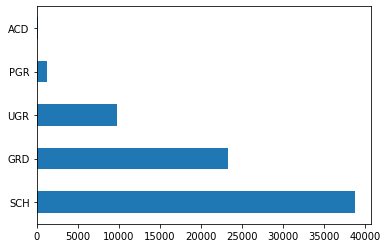

In [12]:
data.education.value_counts().plot.barh()

SCH - school, школа, 8 классов

GRD - graduate, колледж, 10-12 классов

UGR - undergraduate, ВУЗ

PGR - postgraduate, аспирант

ACD - academy, профессор

<AxesSubplot:xlabel='default', ylabel='count'>

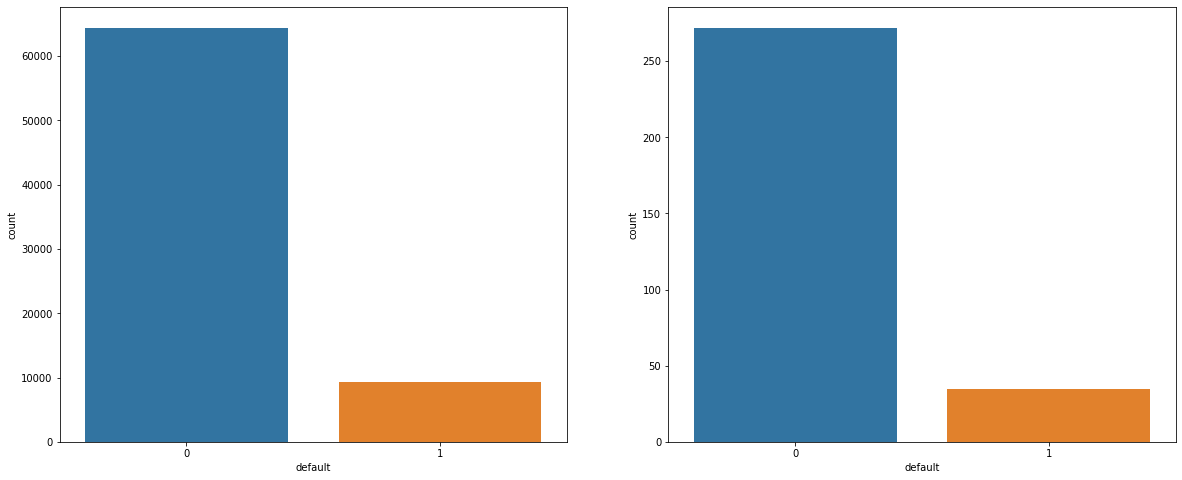

In [13]:
# заполним пропуски в поле 'education'
tmp = data[data.education.isna()]
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

sns.countplot(x='default', data=data, ax=axes[0])
sns.countplot(x='default', data=tmp, ax=axes[1])

[0.0, 60.0, 0.0, 60.0, 0.0, 60.0]

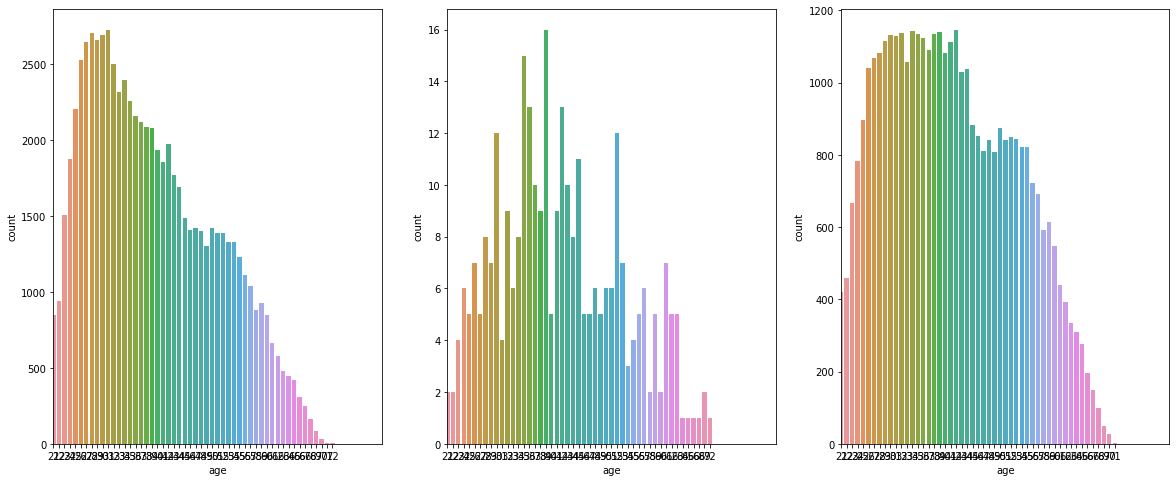

In [14]:
tmp = data[data.education.isna()]
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

sns.countplot(x='age', data=data, ax=axes[0])
sns.countplot(x='age', data=tmp, ax=axes[1])
sns.countplot(x='age', data=data[data.education=='SCH'], ax=axes[2])

plt.setp(axes, xlim=(0,60))

<AxesSubplot:xlabel='good_work', ylabel='count'>

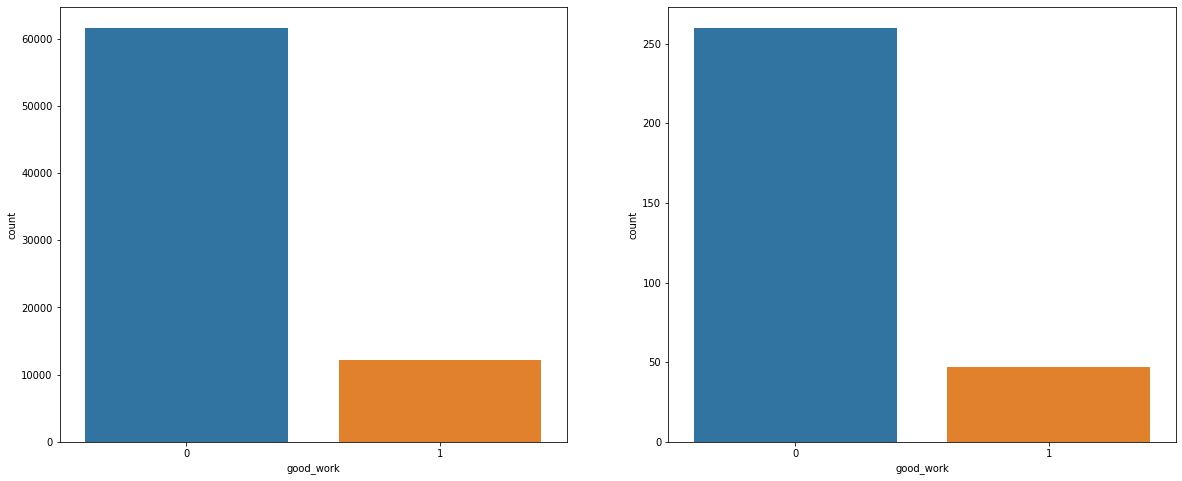

In [15]:
tmp = data[data.education.isna()]
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

sns.countplot(x='good_work', data=data, ax=axes[0])
sns.countplot(x='good_work', data=tmp, ax=axes[1])

In [16]:
# т.к. пропущенных данных не много, то заменим их модой
from scipy.stats import mode

edu_moda = mode(data.education)[0][0]
data.education.fillna(edu_moda, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73799 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [17]:
data.nunique()

client_id           73799
education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
bki_request_cnt        38
home_address            3
work_address            3
income                966
foreign_passport        2
default                 2
dtype: int64

In [18]:
# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

# категориальные переменные
cat_cols = ['education', 'home_address', 'work_address']

# числовые переменные
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

In [19]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(data, test_size=0.33, random_state=42)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

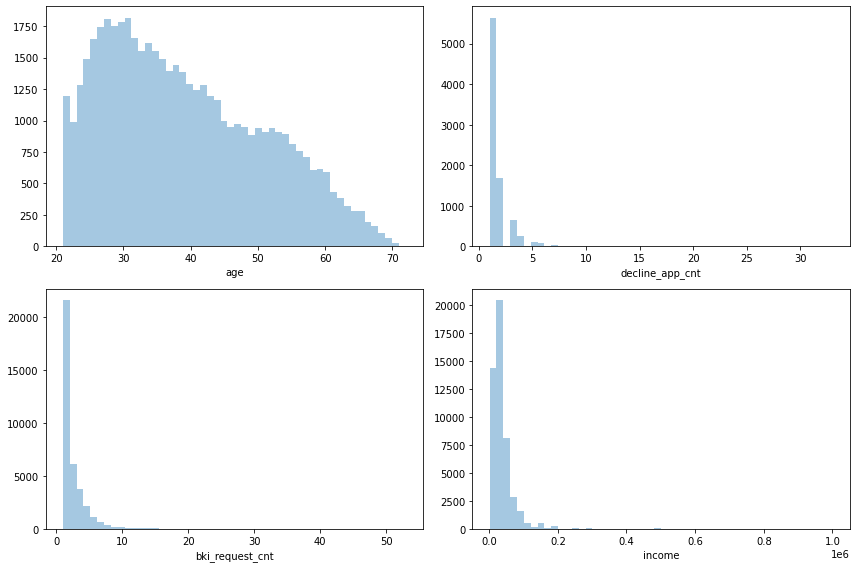

In [20]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8),facecolor='w')
ax=axes.ravel()
for i,col in enumerate(num_cols):
    sns.distplot(train[col][train[col] > 0].dropna(), kde=False, rug=False, ax=ax[i])
    #ax[i].set_title(col)
plt.tight_layout()
plt.show()

После построения гистограмм стало очевидно, что распределения всех числовых переменных имеют тяжёлый правый хвост.   
…Насколько я помню, для того чтобы сделать распределение данных переменных более нормальным, можно работать с логарифмированными величинами этих переменных. Тогда я смогу избежать чувствительности к сильным отклонениям в суммах у линейных моделей.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

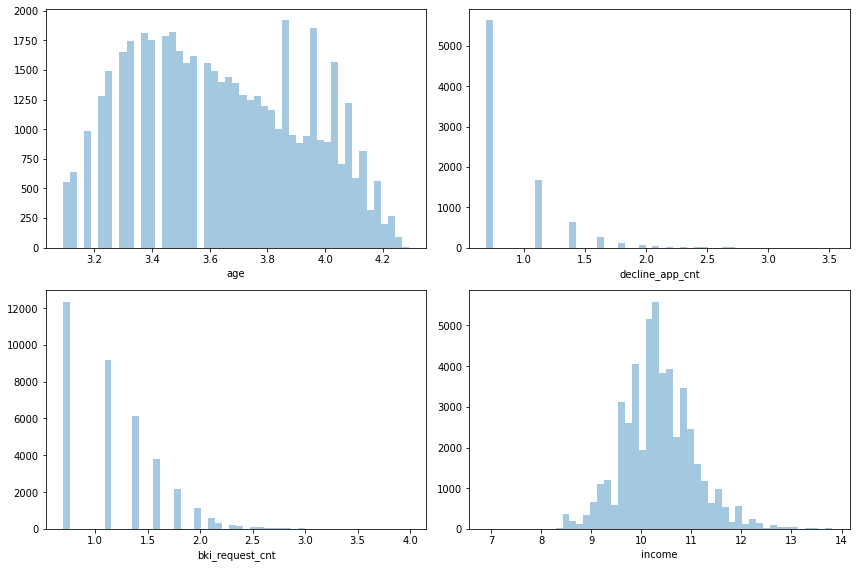

In [21]:
df_log = np.log(train[num_cols]+1)
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8),facecolor='w')
ax=axes.ravel()
for i,col in enumerate(num_cols):
    sns.distplot(df_log[col][df_log[col] > 0].dropna(), kde=False, rug=False, ax=ax[i])
    #ax[i].set_title(col)
plt.tight_layout()
plt.show()

Постройте графики распределения логарифмированных переменных, чтобы переменные стали менее смещенными. Такой принцип можно применить перед построением модели и сравнить значение метрики.

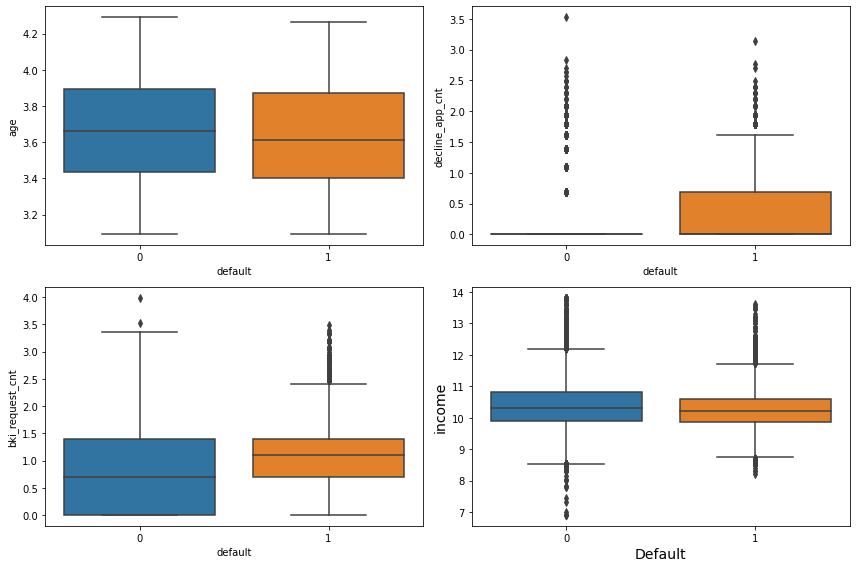

In [22]:
tmp = df_log.join(train['default'], how='left')
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8),facecolor='w')
ax=axes.ravel()
for i,col in enumerate(num_cols):
    sns.boxplot(x='default', y=col, data=tmp, ax=ax[i])
    plt.ylabel(col, fontsize=14)
    plt.xlabel('Default', fontsize=14)
plt.tight_layout()
plt.show()

Постройте boxplot’ы для численных переменных и ответьте на следующие вопросы:

Дефолтные клиенты в среднем ...

младше  
 верно   
Дефолтные клиенты в среднем имеют ... количество отмененных заявок

большое  
 верно   
Дефолтные клиенты в среднем имеют ... запросов в БКИ

больше  
 верно  
Дефолтные клиенты в среднем имеют более ... доход

низкий  
 верно  

Вы помните, что сильная корреляция между переменными вредна для линейных моделей из-за неустойчивости полученных оценок.

Как работать с корреляцией? 

→ Способ 1. Отобрать низко коррелируемые признаки .

→ Способ 2. Использовать регуляризацию, чтобы в процессе обучения штрафовать модель за сложность, выраженную в величине весов, при этом задавая величину штрафа. Изменяя эту величину, я смогу контролировать переобучение и устойчивость модели. 

Но начнём с простого...

<AxesSubplot:>

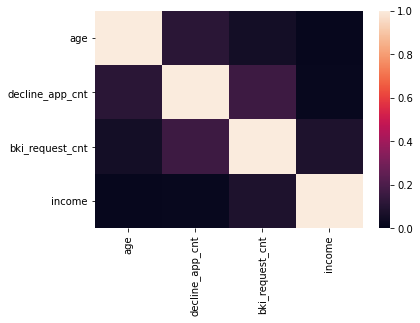

In [23]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)

Сделайте выводы на основе графика и напишите их в поле ниже:  

Числовые признаки имеют невысокий коэффициент корреляции, т.е. можно сказать, линейно независимы  
  верно .
  
Пояснение  

Как мы видим, взаимосвязь пар числовых признаков по Пирсону слабая. Максимальный коэффициент -0.127734 и 0.125163. Это очень здорово для нашей линейной модели!

Для оценки значимости числовых переменных будем использовать функцию f_classif из библиотеки sklearn.  

Возможности модуля sklearn.feature_selection могут быть использованы не только для выбора важных признаков, но и для уменьшения размерности, улучшения предсказательной силы моделей, либо для повышения их производительности на очень многомерных наборах данных.  

В основе метода оценки значимости переменных лежит однофакторный дисперсионный анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).   

В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей линейной модели.

In [24]:
def hist_features(df, cols, target):
    number_of_features = len(cols)
    X = np.log(df[cols]+1) #define feature data
    y = df[target] #define target data.
    
    default = X[y==1] #define features of default borrowes
    stable = X[y==0] #define features of good, stable borrowes
    
    fig, axes = plt.subplots(nrows=number_of_features, ncols=1, figsize=(10,8), facecolor='w')
    ax = axes.ravel() #flat axes with numpy ravel
    for i in range(number_of_features):
        _, bins = np.histogram(X.iloc[:,i], bins=100) #ранжируем bins по общему датасету
        #red color for default class, green color for stable class
        #alpha is for transparency in the overlapped region
        ax[i].hist(default.iloc[:,i], bins=bins, color='r', alpha=0.5)
        ax[i].hist(stable.iloc[:,i], bins=bins, color='g', alpha=0.3)
        ax[i].set_title(X.columns[i], fontsize=9)
        ax[i].set_xticks(())
        ax[i].set_yticks(())

    ax[0].legend(['default','stable'], loc='best', fontsize=8)
    plt.tight_layout()

    plt.show()    

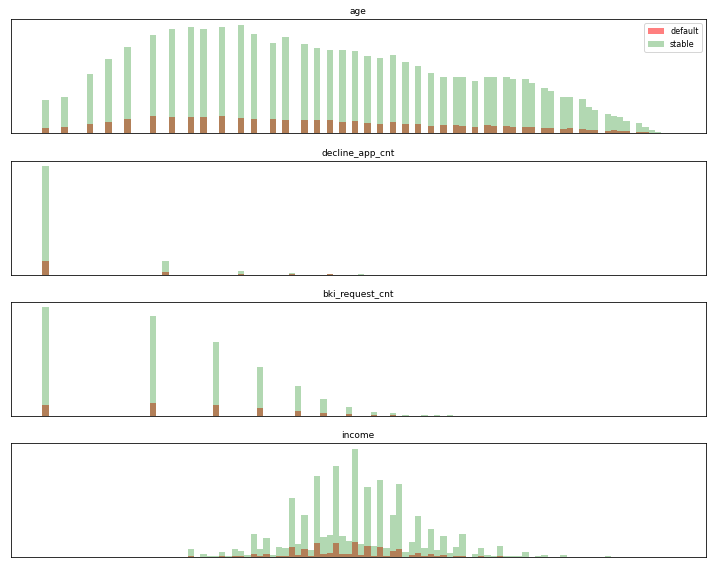

In [25]:
hist_features(data,num_cols,'default')

<AxesSubplot:>

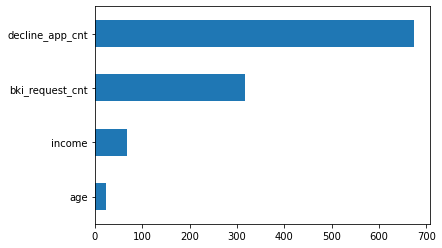

In [26]:
from sklearn.feature_selection import f_classif
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [27]:
pd.DataFrame(f_classif(train[num_cols], train['default']), columns=num_cols, index=['f_statistic','p_values'])

,age,decline_app_cnt,bki_request_cnt,income
f_statistic,23.698242,6.732567e+02,3.165910e+02,6.860102e+01
p_values,0.000001,1.908616e-147,1.330527e-70,1.235267e-16


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train[num_cols])

pd.DataFrame(X_scaled).describe()

,0,1,2,3
count,4.944500e+04,4.944500e+04,4.944500e+04,4.944500e+04
mean,-3.499184e-17,1.853777e-17,-9.003034e-17,-3.808147e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.591712e+00,-3.451953e-01,-8.910240e-01,-8.721797e-01
25%,-8.090616e-01,-3.451953e-01,-8.910240e-01,-4.579378e-01
50%,-2.003334e-01,-3.451953e-01,-4.460205e-01,-2.399158e-01
75%,7.562395e-01,-3.451953e-01,4.439865e-01,1.525239e-01
max,2.843308e+00,4.085515e+01,2.269416e+01,2.090822e+01


In [29]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
#let's check the shape of X_pca array
print('shape of X_pca ',X_pca.shape)
ex_variance = np.var(X_pca, axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

shape of X_pca  (49445, 3)


array([0.36468546, 0.32819361, 0.30712093])

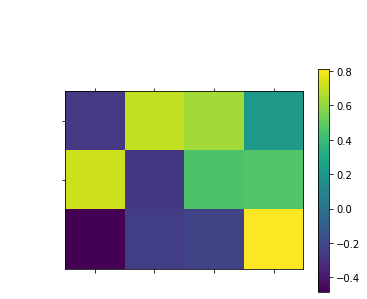

In [30]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10, color='w')
plt.colorbar()
plt.xticks(range(len(num_cols)),num_cols,rotation=65,ha='left', color='w')
#plt.tight_layout()
plt.show()

In [31]:
pca.components_

array([[-0.26843535,  0.69430756,  0.63156221,  0.21681478],
       [ 0.71381221, -0.27607115,  0.44837245,  0.46175642],
       [-0.48339615, -0.24327719, -0.21692888,  0.81245691]])

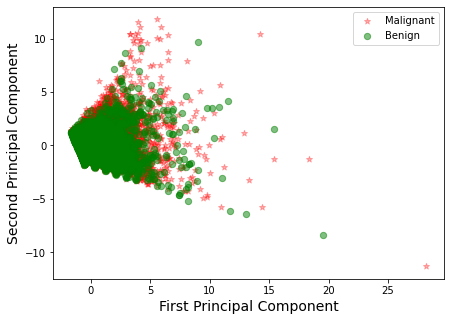

In [32]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=train.default
cdict={0:'red',1:'green'}
labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,\
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

Чтобы алгоритмы машинного обучения могли работать с категориальными данными, их нужно преобразовать в числа...  
Самый простой способ — отобразить каждое значение категории в уникальное число. Например, в поле sex значение sex = female преобразовать в , а sex = male — в . Эту простую операцию приходится делать достаточно часто, поэтому в модуле sklearn.preprocessing именно для этой задачи реализован класс LabelEncoder.  

Метод fit этого класса находит все уникальные значения и строит таблицу для соответствия каждой категории некоторому числу, а метод transform непосредственно преобразует значения в числа. После fit у label_encoder будет доступно поле classes_, содержащее все уникальные значения. Можно их пронумеровать и убедиться, что преобразование выполнено верно.

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(train['education'])
print(dict(enumerate(label_encoder.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}


In [34]:
label_encoder = LabelEncoder()

for col in bin_cols:
    train[col] = label_encoder.fit_transform(train[col])
    
train.tail()

<ipython-input-34-e175c6782d10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = label_encoder.fit_transform(train[col])


,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
37194,15225,SCH,1,28,0,0,1,0,5,1,1,32000,0,0
6265,1002,GRD,0,54,1,0,0,0,6,2,3,80000,0,0
54886,16226,GRD,1,30,0,0,0,0,4,2,3,45000,0,0
860,3695,SCH,1,35,1,0,0,0,1,1,2,30000,0,0
15795,94361,UGR,0,58,0,0,0,0,6,2,3,16000,0,0


Почему мы применили метод только к бинарным переменным? Единственным минусом использования кодирования при помощи LabelEncoder() является то, что при использовании этого подхода мы должны быть уверены, что признак не может принимать неизвестных ранее значений.  

→ Что произойдет, если у нас появятся данные с другими категориями? LabelEncoder будет ругаться, что не знает новую категорию.  

Например, если у нас появится новый пол (помимо женского и мужского), признак sex придется обрабатывать по-другому.  

Исходя из описания, наши признаки строго бинарные (принимают только два значения) и сюрпризов (новых неизвестных значений) быть не должно.

#### ЗНАЧИМОСТЬ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

Для оценки значимости категориальных и бинарных переменных будем использовать функцию mutual_info_classif из библиотеки sklearn. Данная функция опирается на непараметрические методы, основанные на оценке энтропии в группах категориальных переменных.

<ipython-input-35-d4467b46820b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['education'] = label_encoder.fit_transform(train['education'])


<AxesSubplot:>

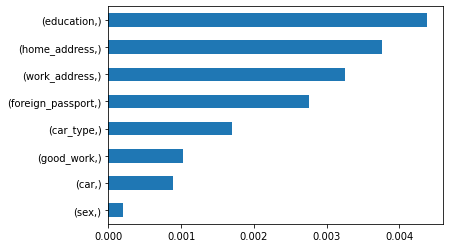

In [35]:
from sklearn.feature_selection import mutual_info_classif

train['education'] = label_encoder.fit_transform(train['education'])

imp_cat = pd.Series(mutual_info_classif(train[bin_cols+cat_cols], train['default'],\
                                        discrete_features=True), index=[bin_cols+cat_cols])
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Сначала необходимо провести разделение на трейн и тест, а затем применять стандартизирование и все остальное. Перед обучением регрессии нам следует стандартизировать числовые признаки, а также воспользоваться dummy-кодированием для категориальных переменных, то есть создать отдельную бинарную переменную для каждой категории.  

Как вы уже поняли, LabelEncoder не совсем подходит для признаков с двумя и большим количеством категорий. Для того, чтобы мы смогли применять линейные модели на таких данных, нам необходим другой метод, который называется One-Hot Encoding. Смысл его точно такой же, как у dummy-кодирования.  

Предположим, что некоторый признак может принимать пять разных значений. В этом случае One Hot Encoding подразумевает создание пяти новых признаков, все из которых равны нулю, за исключением одного. На позицию, соответствующую численному значению признака, мы помещаем 1.  

Эта техника реализована в sklearn.preprocessing в классе OneHotEncoder. По умолчанию OneHotEncoder преобразует данные в разреженную матрицу, чтобы не расходовать память на хранение многочисленных нулей.  

X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)  
Затем каждое целочисленное значение представляется в виде двоичного вектора. Он в свою очередь представляет собой все нулевые значения, кроме индекса целого числа, который отмечен . Когда для выходной переменной используется One Hot Encoding, группа закодированных переменных может предложить более детальный набор предсказаний, чем одна метка.

In [36]:
from sklearn.preprocessing import OneHotEncoder

X_cat = OneHotEncoder(sparse=False).fit_transform(train[cat_cols])#.values)
X_cat.shape

(49445, 11)

In [37]:
train[cat_cols].nunique()

education       5
home_address    3
work_address    3
dtype: int64

In [38]:
pd.DataFrame(X_cat).nunique()

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
dtype: int64

In [39]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(train[num_cols].values)

И объединим стандартизованные числовые, бинарные и закодированные категориальные переменные в одно признаковое пространство, разделив при этом признаки и целевую переменную.

In [40]:
X_train = np.hstack([X_num, train[bin_cols].values, X_cat])
y_train = train['default'].values

In [41]:
X_train.shape

(49445, 20)

→ ЗАДАНИЕ

Проделайте все те же манипуляции с данными на наборе данных validation, которые мы специально отделили в самом начале при знакомстве с данными.  

После преобразования отделите целевую переменную default в validation-наборе данных. Это будут ваши ответы, запишите их в переменную y_true, оставшаяся часть будет храниться в X_validation.  

Обучите модель на валидационном наборе данных на стандартных настройках логистической регрессии.  

Используйте обученную модель для предсказания дефолта в validation-выборке. Запишите предсказанные значения в переменную y_pred = model.predict_proba(X_validation).

In [108]:
def preprocessing(data):
    # бинарные переменные
    bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
    # категориальные переменные
    cat_cols = ['education', 'home_address', 'work_address']
    # числовые переменные
    num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

    # обработка бинарных переменных
    X_bin = []
    for col in bin_cols:
        X_bin.append(LabelEncoder().fit_transform(data[col].values))
    # обработка категориальных переменных
    X_cat = OneHotEncoder(sparse=False).fit_transform(data[cat_cols].values)
    # Логарифмирование и стандартизация числовых переменных
    X_num = StandardScaler().fit_transform(np.log(data[num_cols]+1).values)
    
    # объединим стандартизованные числовые, бинарные и закодированные категориальные переменные
    # в одно признаковое пространство
    X_train = np.hstack([X_num, data[bin_cols].values, X_cat])
    y_train = data['default'].values
    
    return X_train, y_train

In [121]:
from sklearn.linear_model import LogisticRegression

X_validation, y_true = preprocessing(validation)

model = LogisticRegression()
model.fit(X_validation, y_true)
y_pred = model.predict(X_validation)
y_pred_proba = model.predict_proba(X_validation)

In [110]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

confusion_matrix(y_true, y_pred)

array([[21287,     7],
       [ 3050,    10]], dtype=int64)

In [111]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     21294
           1       0.59      0.00      0.01      3060

    accuracy                           0.87     24354
   macro avg       0.73      0.50      0.47     24354
weighted avg       0.84      0.87      0.82     24354



In [74]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1,1,1], [1, 1, 1, 0,1,1]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 3)

In [73]:
confusion_matrix([0, 1, 0, 1,1,1], [1, 1, 1, 0,1,1])

array([[0, 2],
       [1, 3]], dtype=int64)

In [79]:
(y_true-y_pred).sum()

3003

In [101]:
y_pred_proba[:,1]

array([0.13450586, 0.10974234, 0.08679018, ..., 0.13608851, 0.09612516,
       0.10931023])

In [100]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
roc_auc_score(y_true, y_pred)

0.5031467024679694

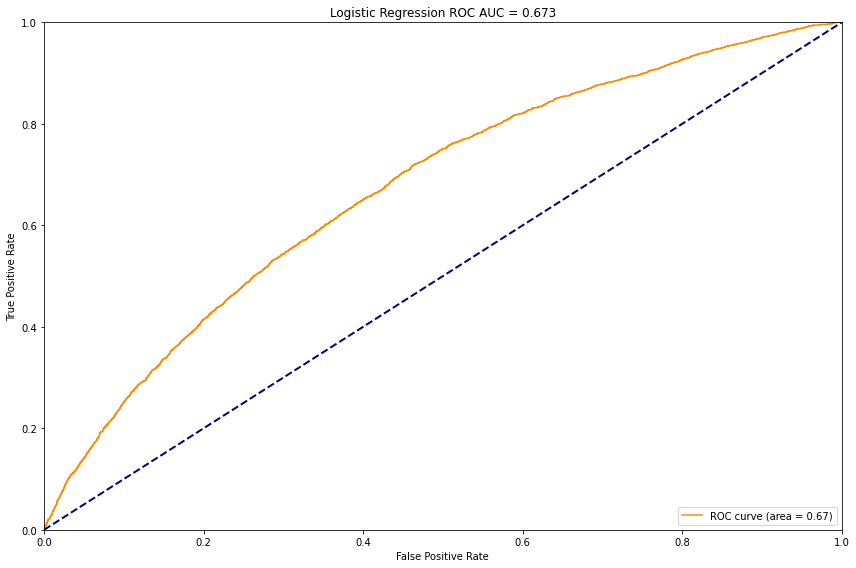

In [116]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:,1])

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8), facecolor='w')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [122]:
# запускаем GridSearch на небольшом кол-ве итераций max_iter=50 и с достаточно большой дельтой останова tol1e-3
# чтобы получить оптимальные параметры модели в первом приближении
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

iter_ = 50
epsilon_stop = 1e-3

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

## model ваша модель логистической регрессии
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model_2 = gridsearch.best_estimator_

##печатаем параметры
best_parameters = model_2.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.29278321        nan
 0.29278379        nan 0.01410926 0.01410926        nan 0.01410926
 0.01410926 0.01410926 0.01410926        nan 0.01410926 0.01410926
 0.29246614 0.29253216 0.29248833 0.29248832 0.2925501  0.29246614
 0.29253216 0.29248833 0.292444   0.2924221  0.01410926 0.01410926
 0.01410926 0.01410926 0.01410926 0.01410926 0.01410926 0.01410926
 0.29263534 0.29261319 0.29259159 0.29261377 0.29263534 0.29261319
 0.29261375 0.29261404]
  warnings.warn(


	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 50
	multi_class: 'ovr'
	n_jobs: None
	penalty: 'l1'
	random_state: None
	solver: 'liblinear'
	tol: 0.001
	verbose: 0
	warm_start: False


In [123]:
model_2.fit(X_validation, y_true)
y_pred_2 = model_2.predict(X_validation)
y_pred_proba_2 = model_2.predict_proba(X_validation)

In [ ]:
def plot_roc_auc(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:,1])
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_true, y_pred_proba_2[:,1])

    roc_auc = auc(fpr, tpr)
    roc_auc_2 = auc(fpr_2, tpr_2)

    plt.figure(figsize=(12,8), facecolor='w')
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


In [149]:
print('Classification Report')
print(classification_report(y_true, y_pred_2))
print('Confusion matrix')
print(pd.DataFrame(confusion_matrix(y_true, y_pred_2)))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.62      0.74     21294
           1       0.19      0.63      0.29      3060

    accuracy                           0.62     24354
   macro avg       0.56      0.63      0.52     24354
weighted avg       0.83      0.62      0.68     24354

Confusion matrix
       0     1
0  13109  8185
1   1118  1942


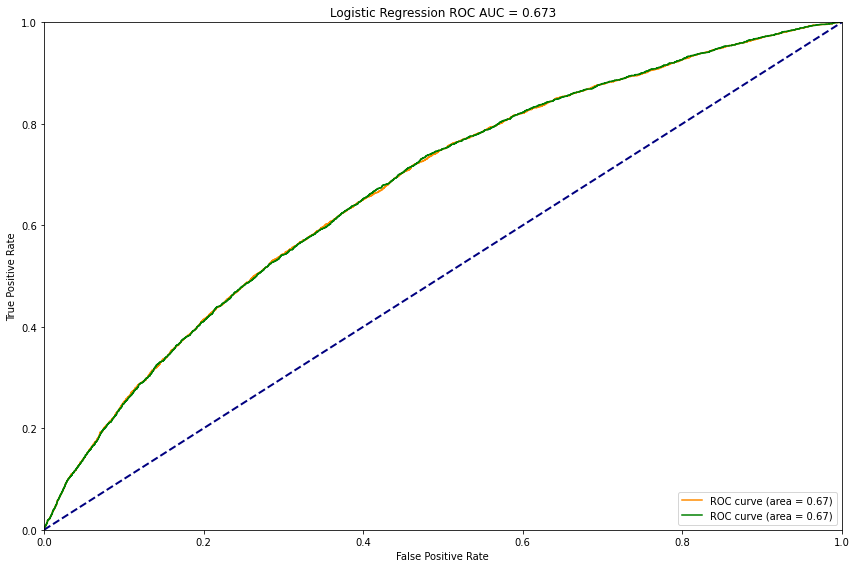

In [125]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:,1])
fpr_2, tpr_2, thresholds_2 = roc_curve(y_true, y_pred_proba_2[:,1])

roc_auc = auc(fpr, tpr)
roc_auc_2 = auc(fpr_2, tpr_2)

plt.figure(figsize=(12,8), facecolor='w')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

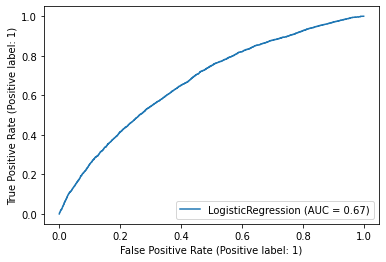

In [151]:
from sklearn.metrics import plot_roc_curve

model = LogisticRegression()
model.fit(X_validation, y_true)
plot_roc_curve(model, X_validation, y_true)

In [127]:

"""
Optuna example that optimizes a classifier configuration using OptunaSearchCV.
In this example, we optimize a classifier configuration for Iris dataset using OptunaSearchCV.
Classifier is from scikit-learn.
"""

import optuna

from sklearn.datasets import load_iris
from sklearn.svm import SVC


if __name__ == "__main__":
    clf = SVC(gamma="auto")

    param_distributions = {
        "C": optuna.distributions.LogUniformDistribution(1e-10, 1e10),
        "degree": optuna.distributions.IntUniformDistribution(1, 5),
    }

    optuna_search = optuna.integration.OptunaSearchCV(
        clf, param_distributions, n_trials=100, timeout=600, verbose=2
    )

    X, y = load_iris(return_X_y=True)
    optuna_search.fit(X, y)

    print("Best trial:")
    trial = optuna_search.study_.best_trial

    print("  Value: ", trial.value)
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

<ipython-input-127-8db5be1081c7>:21: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = optuna.integration.OptunaSearchCV(
[I 2022-01-15 23:08:40,363] A new study created in memory with name: no-name-612224f8-5ffd-490d-8856-8792c39e2551
[I 2022-01-15 23:08:40,363] Searching the best hyperparameters using 150 samples...
[I 2022-01-15 23:08:40,377] Trial 0 finished with value: 0.9400000000000001 and parameters: {'C': 621188.0793037666, 'degree': 1}. Best is trial 0 with value: 0.9400000000000001.
[I 2022-01-15 23:08:40,391] Trial 1 finished with value: 0.9333333333333333 and parameters: {'C': 0.0006610445385951941, 'degree': 3}. Best is trial 0 with value: 0.9400000000000001.
[I 2022-01-15 23:08:40,403] Trial 2 finished with value: 0.9400000000000001 and parameters: {'C': 5951.683488014328, 'degree': 2}. Best is trial 0 with value: 0.9400000000000001.
[I 2022-01-15 23:08:40,417] Trial 3 finished with val

[I 2022-01-15 23:08:41,100] Trial 41 finished with value: 0.9666666666666668 and parameters: {'C': 22.678855615398653, 'degree': 3}. Best is trial 11 with value: 0.9800000000000001.
[I 2022-01-15 23:08:41,122] Trial 42 finished with value: 0.9333333333333333 and parameters: {'C': 0.040695135449557746, 'degree': 1}. Best is trial 11 with value: 0.9800000000000001.
[I 2022-01-15 23:08:41,139] Trial 43 finished with value: 0.9800000000000001 and parameters: {'C': 5.751228017860784, 'degree': 2}. Best is trial 11 with value: 0.9800000000000001.
[I 2022-01-15 23:08:41,157] Trial 44 finished with value: 0.9800000000000001 and parameters: {'C': 1.2572408481664263, 'degree': 5}. Best is trial 11 with value: 0.9800000000000001.
[I 2022-01-15 23:08:41,176] Trial 45 finished with value: 0.9400000000000001 and parameters: {'C': 2243.754147707241, 'degree': 2}. Best is trial 11 with value: 0.9800000000000001.
[I 2022-01-15 23:08:41,194] Trial 46 finished with value: 0.9666666666666666 and parameter

[I 2022-01-15 23:08:41,841] Trial 84 finished with value: 0.96 and parameters: {'C': 0.1788182336698804, 'degree': 5}. Best is trial 47 with value: 0.9866666666666667.
[I 2022-01-15 23:08:41,860] Trial 85 finished with value: 0.9333333333333333 and parameters: {'C': 0.015743079148870694, 'degree': 2}. Best is trial 47 with value: 0.9866666666666667.
[I 2022-01-15 23:08:41,874] Trial 86 finished with value: 0.9866666666666667 and parameters: {'C': 3.521254507813642, 'degree': 5}. Best is trial 47 with value: 0.9866666666666667.
[I 2022-01-15 23:08:41,894] Trial 87 finished with value: 0.9333333333333333 and parameters: {'C': 2.9660606846519583e-10, 'degree': 5}. Best is trial 47 with value: 0.9866666666666667.
[I 2022-01-15 23:08:41,909] Trial 88 finished with value: 0.9800000000000001 and parameters: {'C': 12.712173027532897, 'degree': 5}. Best is trial 47 with value: 0.9866666666666667.
[I 2022-01-15 23:08:41,925] Trial 89 finished with value: 0.9533333333333334 and parameters: {'C': 

Best trial:
  Value:  0.9866666666666667
  Params: 
    C: 4.07422957728924
    degree: 5


In [156]:
def objective(trial):
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    tol = trial.suggest_float("tol", 0.0001, 0.01, log=True)
    C = trial.suggest_float("C", 1.0, 10.0, log=True)
    intercept = trial.suggest_categorical("fit_intercept", [True, False])
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])

    ## Create Model
    classifier = LogisticRegression(penalty=penalty,
                                    tol=tol,
                                    C=C,
                                    fit_intercept=intercept,
                                    solver=solver,
                                    multi_class="auto",
                                   )
    ## Fit Model
    classifier.fit(X_train, y_train)

    return classifier.score(X_valid, Y_test)

<ipython-input-156-fc6694cca764>:19: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = optuna.integration.OptunaSearchCV(


ValueError: Value of solver must be a optuna distribution.

In [159]:
from pandas_profiling import ProfileReport

In [161]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]